Question 1.


In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed

In [2]:
from google.colab import files
uploaded = files.upload()



Saving abalone.data to abalone.data


In [34]:
dataset = pd.read_csv("abalone.data")
dataset.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [35]:
dataset.columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Age"]
dataset.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [14]:
dataset.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50e300bd50>,
      dtype=object)

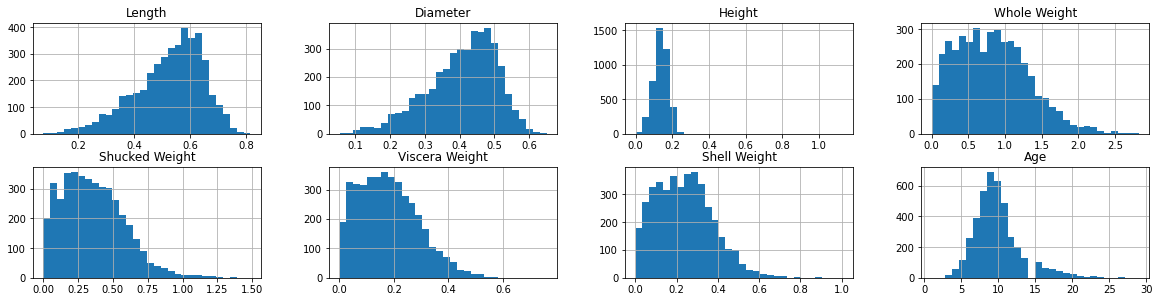

In [16]:
dataset.hist(figsize=(20,10), grid = True, layout=(4, 4), bins = 30)

In [17]:
stringData =  dataset.select_dtypes(include=[np.object]).columns
print(stringData)

Index(['Sex'], dtype='object')


In [18]:
# check the missing points
missing = dataset.isnull().sum().sort_values(ascending = False)
percentageMissing = (missing/len(dataset))*100
pd.concat([missing, percentageMissing], axis = 1, keys= ['Number of missing values ', 'Percentage of Missing Values'])

,Number of missing values,Percentage of Missing Values
Age,0,0.0
Shell Weight,0,0.0
Viscera Weight,0,0.0
Shucked Weight,0,0.0
Whole Weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


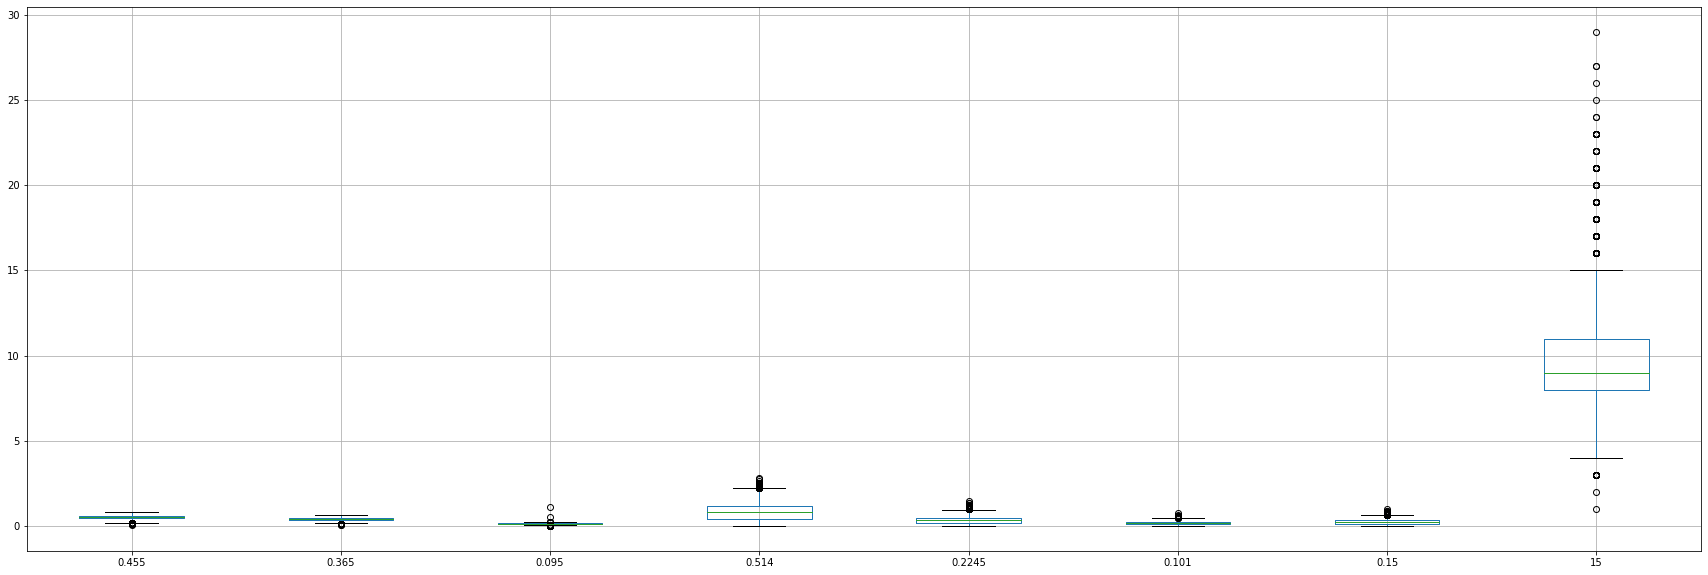

In [25]:
dataset.boxplot(figsize = (30, 10))

In [36]:
#Preprocesing data
for label in "MFI":
    dataset[label] = (dataset["Sex"] == label)
del dataset["Sex"]

dataset.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,M,F,I
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,True,False,False
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,True,False
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,True,False,False
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,False,True
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,False,False,True


In [37]:
#Spliting the target value.
y = dataset.Age.values
del dataset["Age"]
X = dataset.values.astype(np.float)

In [67]:
# Getting random indices.
indices = list(range(X.shape[0]))
training_instances = int(0.8 * X.shape[0])
np.random.shuffle(indices)
train = indices[:training_instances]
test = indices[training_instances:]

# Spliting the dataset.
X_train, X_test = X[train], X[test]
y_train, y_test = y[train], y[test]

X_train.shape

(3340, 10)

In [40]:
# Linear Regression Model

# Cost Function
def cost(X, y, coeffMatrix):
    sizeX = len(X)
    cost = np.sum(((X.dot(coeffMatrix.T)) - y) ** 2) / (2 * sizeX)
    return cost

# Gradient Descent Function
def gradientDescent(X, y, coeffMatrix, alpha, n_iters):

    # Values of all costs 
    costValues = [0]*n_iters
    sizeY = len(y)

    # Iterating
    for iter in range(n_iters):
        
        # Calculating the loss
        loss = (X.dot(coeffMatrix.T)) - y

        # Calculating the gradient
        grad = X.T.dot(loss)/(sizeY)

        # Updating the coefficent values
        coeffMatrix = coeffMatrix - (alpha*grad.T)

        # Calculating the new cost.
        costVal = cost(X, y, coeffMatrix)
        costValues[iter] = costVal


    print("Final Model Coefficients: ")
    print(coeffMatrix)
    print("Final Model Cost: ", costValues[-1])
    return coeffMatrix, costValues

def LinearRegression(X, y):

    # Assigning values to coefficient Matrix
    coeffMatrix = np.zeros((len(X[0])))
    startCost = cost(X, y, coeffMatrix)
    print('Initial Cost: ', startCost)

    # Calling the gradient descent with alpha and number of iterations
    coeffMatrix, costValues = gradientDescent(X, y, coeffMatrix, 0.2, 1000)
    return coeffMatrix, costValues

def predict(X, coeffMatrix):

    # Using the new coefficients to calculate the y_pred values
    y_pred = X.dot(coeffMatrix.T)
    return y_pred

def RMSE(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred)**2) / len(y))
    return rmse

In [66]:
# Calling the linear Regression model
seed(0)

# Training the model
linearModel, costValues = LinearRegression(X_train, y_train)
print()

# Predicting the trainging values
y_train_pred = predict(X_train, linearModel)

# Predicting the test values
y_test_pred = predict(X_test, linearModel)

# Caculating the rmse values
rmse_train = RMSE(y_train, y_train_pred)
rmse_test = RMSE(y_test, y_test_pred)

print('Train data RMSE: ', rmse_train)
print("Test data RMSE: ", rmse_test)


Initial Cost:  54.60449101796407
Final Model Coefficients: 
[ 5.23541818  4.89398359  2.9123925   2.74404701 -9.07678866 -0.91306986
  7.48380313  4.51644191  4.52433773  3.411523  ]
Final Model Cost:  2.7058631109568294

Train data RMSE:  2.3263117207102004
Test data RMSE:  2.2309095075650265


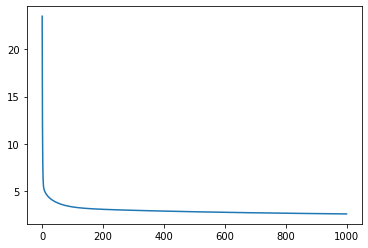

In [42]:
plt.plot(costValues)

Ridge Regression And Lasso Regresion

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

The alpha values are:  [0.01       0.03010101 0.05020202 0.07030303 0.09040404 0.11050505
 0.13060606 0.15070707 0.17080808 0.19090909 0.2110101  0.23111111
 0.25121212 0.27131313 0.29141414 0.31151515 0.33161616 0.35171717
 0.37181818 0.39191919 0.4120202  0.43212121 0.45222222 0.47232323
 0.49242424 0.51252525 0.53262626 0.55272727 0.57282828 0.59292929
 0.6130303  0.63313131 0.65323232 0.67333333 0.69343434 0.71353535
 0.73363636 0.75373737 0.77383838 0.79393939 0.8140404  0.83414141
 0.85424242 0.87434343 0.89444444 0.91454545 0.93464646 0.95474747
 0.97484848 0.99494949 1.01505051 1.03515152 1.05525253 1.07535354
 1.09545455 1.11555556 1.13565657 1.15575758 1.17585859 1.1959596
 1.21606061 1.23616162 1.25626263 1.27636364 1.29646465 1.31656566
 1.33666667 1.35676768 1.37686869 1.3969697  1.41707071 1.43717172
 1.45727273 1.47737374 1.49747475 1.51757576 1.53767677 1.55777778
 1.57787879 1.5979798  1.61808081 1.63818182 1.65828283 1.67838384
 1.69848485 1.71858586 1.73868687 1.7587

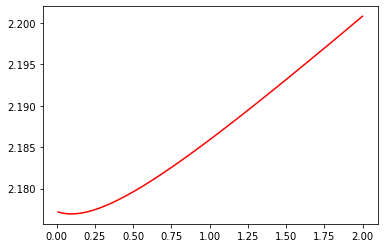

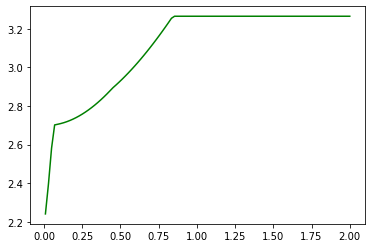

In [58]:
alphaValues = np.linspace(0.01, 2.0, num = 100)
print("The alpha values are: ", alphaValues)
ridgeRMSEs = []
lassoRMSEs = []

for a in alphaValues:
    ridgeModel = Ridge(alpha = a)
    ridgeModel.fit(X_train, y_train)
    predictedTarget = ridgeModel.predict(X_test)
    ridgeRMSEs.append(RMSE(y_test, predictedTarget))

    lassoModel = Lasso(alpha = a)
    lassoModel.fit(X_train, y_train)
    predictedTarget = lassoModel.predict(X_test)
    lassoRMSEs.append(RMSE(y_test, predictedTarget))

plt.plot(alphaValues, ridgeRMSEs, 'r')
plt.show()

plt.plot(alphaValues, lassoRMSEs, 'g')
plt.show()


In [59]:
# Minimum values of alpha for ridge and lasso
alpha_ridge = alphaValues[ridgeRMSEs.index(min(ridgeRMSEs))]
alpha_lasso = alphaValues[lassoRMSEs.index(min(lassoRMSEs))]

print("The best alpha value for ridge regression is: ", alpha_ridge)
print()
print("The best alpha value for lasso regression is: ", alpha_lasso)


The best alpha value for ridge regression is:  0.0904040404040404

The best alpha value for lasso regression is:  0.01


In [47]:
# Grid Search for lasso and ridge.
from sklearn.model_selection import GridSearchCV

In [68]:
# Arrays to be used for grid search
alphaValues = {"alpha" : np.linspace(0.01, 2.0, num = 100)}
lassoModelprime = GridSearchCV(Lasso(), param_grid = alphaValues)
lassoModelprime.fit(X_train, y_train)

print("The best alpha value for lasso Regression: ")
lassoModelprime.best_params_


The best alpha value for lasso Regression: 


{'alpha': 0.01}

In [69]:
ridgeModelprime = GridSearchCV(Ridge(), param_grid = alphaValues)
ridgeModelprime.fit(X_train, y_train)

print("The best alpha value for ridge Regression: ")
ridgeModelprime.best_params_

The best alpha value for ridge Regression: 


{'alpha': 0.050202020202020206}